In [2]:
from reComBat import reComBat


In [3]:
pwd

'/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/reComBat-main/reComBat'

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
cts = pd.read_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted.csv")
metadata =   cts[["Experiment", "Sample", "Age"]]



In [21]:
subset_data

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR12604218,SRR12604219,SRR12604220,SRR12604221,SRR12604222,SRR12604223,SRR12604224,SRR12604225,SRR12604226,SRR12604227
ENSG00000128383.12,-0.022699,-0.030376,-0.039042,-0.016999,-0.032492,-0.024125,-0.025551,-0.021695,-0.036062,-0.028600,...,-0.034679,-0.033182,-0.032632,-0.035032,-0.031444,-0.032053,-0.034546,-0.035587,-0.032627,-0.031679
ENSG00000229305.1,-0.022566,-0.030376,-0.039271,-0.017040,-0.032462,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.035184,-0.033323,-0.033782,-0.036153,-0.031741,-0.032821,-0.034546,-0.035587,-0.032833,-0.032818
ENSG00000253040.1,-0.022699,-0.030376,-0.039462,-0.017040,0.077934,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.035184,-0.033323,-0.033782,-0.036153,-0.031741,-0.032821,-0.034546,-0.035587,-0.032833,-0.032818
ENSG00000183036.10,-0.022699,-0.030376,-0.039462,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.035879,-0.028600,...,-0.035184,-0.033323,-0.033782,-0.036153,-0.031568,-0.032821,-0.034546,-0.035587,-0.032833,-0.032818
ENSG00000276257.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032257,-0.024174,-0.025551,-0.021723,-0.035551,-0.028600,...,-0.035184,-0.033323,-0.033782,-0.036153,-0.031741,-0.032821,-0.034546,-0.035587,-0.031710,-0.032818
ENSG00000182749.5,-0.022090,-0.029859,-0.035756,-0.016775,-0.026923,-0.023290,-0.022715,-0.021248,-0.034935,-0.025648,...,-0.032946,-0.031593,-0.031838,-0.033465,-0.029555,-0.031562,-0.032365,-0.033683,-0.031252,-0.031007
ENSG00000177697.18,-0.022000,-0.028289,-0.032129,-0.016780,-0.025844,-0.022839,-0.023315,-0.021275,-0.026142,-0.026391,...,0.000923,0.018673,0.001629,-0.000749,0.006582,-0.001763,0.017824,0.005469,-0.006778,-0.000059
ENSG00000226280.2,-0.022238,-0.030376,-0.038370,-0.017040,-0.024538,-0.024080,-0.025468,-0.021605,-0.036062,-0.028600,...,-0.035184,-0.033323,-0.033782,-0.036153,-0.031741,-0.032821,-0.034546,-0.035587,-0.032833,-0.032818
ENSG00000235374.2,-0.022699,-0.030336,-0.039292,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.035967,-0.028166,...,-0.032511,-0.032056,-0.031753,-0.033524,-0.029273,-0.031061,-0.033035,-0.034193,-0.030975,-0.029929
ENSG00000166407.13,-0.022699,-0.029625,-0.038777,-0.016976,-0.032808,-0.024080,-0.025551,-0.021664,-0.034504,-0.028397,...,-0.016211,-0.016689,-0.020760,-0.018575,-0.016800,-0.017563,-0.010261,-0.010427,-0.021727,-0.020075


In [103]:
from matplotlib.colors import ListedColormap


# Filter the DataFrame to select only the random genes
subset_data = data#.loc[random_genes]
experiment_order

data

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR12604218,SRR12604219,SRR12604220,SRR12604221,SRR12604222,SRR12604223,SRR12604224,SRR12604225,SRR12604226,SRR12604227
ENSG00000000003.14,-0.019945,-0.021474,-0.027244,-0.015458,-0.012505,-0.021658,-0.020410,-0.018321,-0.029712,-0.023722,...,-0.031994,-0.030134,-0.030749,-0.031806,-0.028197,-0.028750,-0.029912,-0.031630,-0.030133,-0.029615
ENSG00000000005.5,-0.022699,-0.030376,-0.036875,-0.016925,-0.032016,-0.024174,-0.025551,-0.021723,-0.036062,-0.028005,...,-0.035184,-0.033323,-0.033782,-0.036153,-0.031741,-0.032821,-0.034546,-0.035587,-0.032833,-0.032818
ENSG00000000419.12,-0.016919,-0.013524,-0.009650,-0.012769,-0.014582,-0.017378,-0.005941,-0.014242,-0.017971,-0.015232,...,0.005857,0.000461,0.004152,0.008920,0.002851,0.016925,0.014661,0.007033,0.012313,0.002413
ENSG00000000457.13,-0.022119,-0.024452,-0.034146,-0.016488,-0.028775,-0.023381,-0.021239,-0.020325,-0.030124,-0.025721,...,-0.033396,-0.030382,-0.030279,-0.033118,-0.029373,-0.030222,-0.030425,-0.032444,-0.031465,-0.030094
ENSG00000000460.16,-0.019507,-0.026882,-0.024127,-0.015993,-0.019309,-0.021414,-0.021425,-0.019926,-0.028292,-0.020576,...,-0.034483,-0.032501,-0.033071,-0.034885,-0.030759,-0.031889,-0.033843,-0.034894,-0.032287,-0.032391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032318,-0.023451,-0.023258,-0.021723,-0.036062,-0.028600,...,-0.032924,-0.032148,-0.029708,-0.034578,-0.030378,-0.031757,-0.032677,-0.032982,-0.030245,-0.031259
ENSG00000285491.1,-0.022699,-0.030376,-0.038796,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.035184,-0.033323,-0.033782,-0.036153,-0.031741,-0.032821,-0.034546,-0.035587,-0.032833,-0.032818
ENSG00000285505.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.035184,-0.033323,-0.033782,-0.036153,-0.031741,-0.032821,-0.034493,-0.035587,-0.032833,-0.032818
ENSG00000285508.1,-0.018902,-0.013662,-0.035684,-0.013806,-0.028431,-0.019287,-0.025551,-0.020104,-0.029194,-0.024663,...,-0.035184,-0.030781,-0.029091,-0.034157,-0.031139,-0.028554,-0.034546,-0.035224,-0.032833,-0.032818


In [53]:
pd.DataFrame(experiment_order).value_counts()

GSE157585    84
GSE164471    46
GSE152558     5
Name: count, dtype: int64

In [72]:
experiments = list(set(experiment_order))

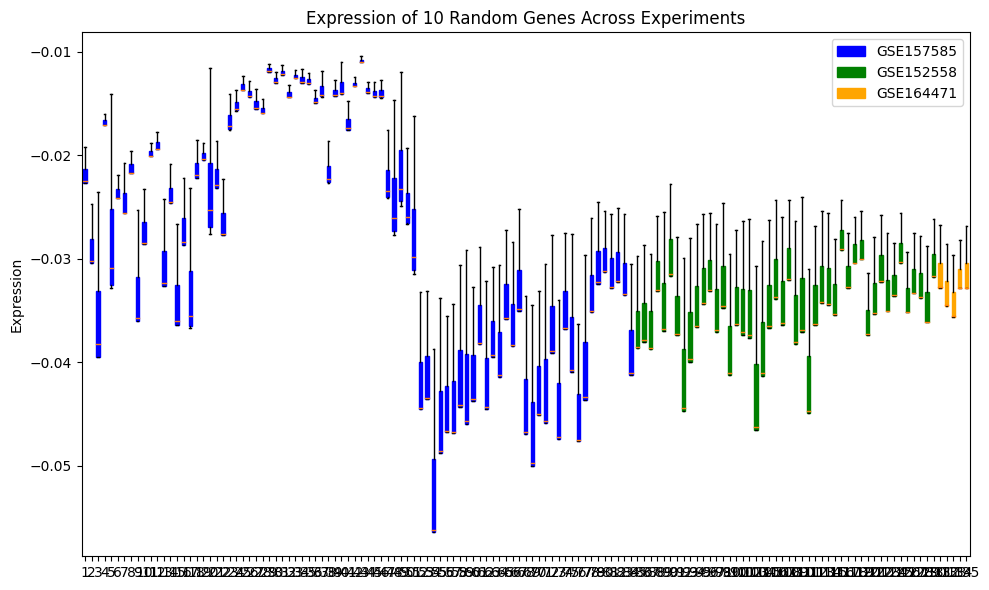

In [102]:
import matplotlib.pyplot as plt

# Define colors
blue_color = 'blue'
purple_color = 'green'
orange_color = 'orange'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot for the first 84 columns
box1 = ax.boxplot(subset_data.iloc[:, :84], positions=list(range(1,85)), showfliers=False, patch_artist=True,
                  boxprops=dict(facecolor=blue_color, color=blue_color)
                  )

# Boxplot for the next 45 columns
box2 = ax.boxplot(subset_data.iloc[:, 84:130], positions=list(range(85,131)), showfliers=False, patch_artist=True,
                  boxprops=dict(facecolor=purple_color, color=purple_color)
                  )

# Boxplot for the remaining columns
box3 = ax.boxplot(subset_data.iloc[:, 130:], positions=list(range(131,136)), showfliers=False, patch_artist=True,
                  boxprops=dict(facecolor=orange_color, color=orange_color)
                  )

# Set labels and titles
ax.set_title('Expression of 10 Random Genes Across Experiments')
ax.set_ylabel('Expression')

# Adjust legend
ax.legend([box1["boxes"][0], box2["boxes"][0], box3["boxes"][0]], experiments)

plt.tight_layout()
plt.show()


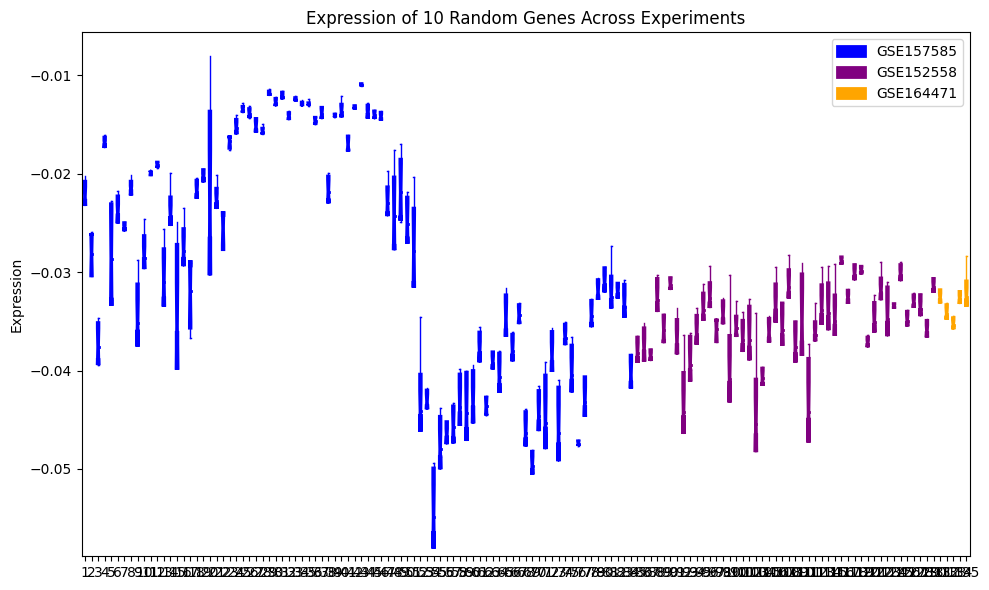

In [94]:
import matplotlib.pyplot as plt

# Define colors
blue_color = 'blue'
purple_color = 'purple'
orange_color = 'orange'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Boxplot for the first 84 columns
box1 = ax.boxplot(subset_data.iloc[:, :84], positions=list(range(1, 85)), showfliers=False, notch=True, patch_artist=True,
                  boxprops=dict(facecolor=blue_color, color=blue_color, linewidth=2),
                  capprops=dict(color=blue_color, linewidth=1),
                  whiskerprops=dict(color=blue_color, linewidth=1),
                  flierprops=dict(color=blue_color, markeredgecolor=blue_color, linewidth=2),
                  medianprops=dict(color=blue_color, linewidth=2),
                  widths=0.25)

# Boxplot for the next 45 columns
box2 = ax.boxplot(subset_data.iloc[:, 84:130], positions=list(range(85, 131)), showfliers=False, notch=True, patch_artist=True,
                  boxprops=dict(facecolor=purple_color, color=purple_color, linewidth=2),
                  capprops=dict(color=purple_color, linewidth=1),
                  whiskerprops=dict(color=purple_color, linewidth=1),
                  flierprops=dict(color=purple_color, markeredgecolor=purple_color, linewidth=2),
                  medianprops=dict(color=purple_color, linewidth=2),
                  widths=0.25)

# Boxplot for the remaining columns
box3 = ax.boxplot(subset_data.iloc[:, 130:], positions=list(range(131, 136)), showfliers=False, notch=True, patch_artist=True,
                  boxprops=dict(facecolor=orange_color, color=orange_color, linewidth=2),
                  capprops=dict(color=orange_color, linewidth=1),
                  whiskerprops=dict(color=orange_color, linewidth=1),
                  flierprops=dict(color=orange_color, markeredgecolor=orange_color, linewidth=2),
                  medianprops=dict(color=orange_color, linewidth=2),
                  widths=0.25)

# Set labels and titles
ax.set_title('Expression of 10 Random Genes Across Experiments')
ax.set_ylabel('Expression')

# Adjust legend
ax.legend([box1["boxes"][0], box2["boxes"][0], box3["boxes"][0]], experiments)

plt.tight_layout()
plt.show()


In [32]:
color_mapping = {'GSE152558': (0, 0, 1.0, 1),
 'GSE157585': (0, 1, 0, 1.0),
 'GSE164471': (1, 0, 0, 1.0)}


{'GSE152558': (0.267004, 0.004874, 0.329415, 1.0),
 'GSE157585': (0.26851, 0.009605, 0.335427, 1.0),
 'GSE164471': (0.271305, 0.019942, 0.347269, 1.0)}

In [2]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts
experiment_order = cts["Experiment"].tolist() 
age_order = cts["Age"].tolist()


In [3]:
def map_to_category(age):
    if age < 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

# Map values in age_order to categories
age_order = [map_to_category(age) for age in age_order]

In [4]:
cts_processed = cts.copy()
cts_processed.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)
cts_processed.set_index("Sample",  inplace=True)

In [5]:
from combat.pycombat import pycombat
data = cts.copy()

# Extract batch information into a separate variable
# Replace 'batch_column_name' with the name of the column containing batch information
batch_info = data['Experiment']

# Remove the batch column from the data
data.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)

data.set_index("Sample", inplace=True)


In [6]:
data= data.T
data = (data - data.mean()) / data.std()

data.fillna(0, inplace=True)

In [13]:
data.columns

Index(['SRR13388732', 'SRR13388733', 'SRR13388734', 'SRR13388735',
       'SRR13388736', 'SRR13388737', 'SRR13388738', 'SRR13388739',
       'SRR13388740', 'SRR13388741',
       ...
       'SRR12604218', 'SRR12604219', 'SRR12604220', 'SRR12604221',
       'SRR12604222', 'SRR12604223', 'SRR12604224', 'SRR12604225',
       'SRR12604226', 'SRR12604227'],
      dtype='object', name='Sample', length=135)

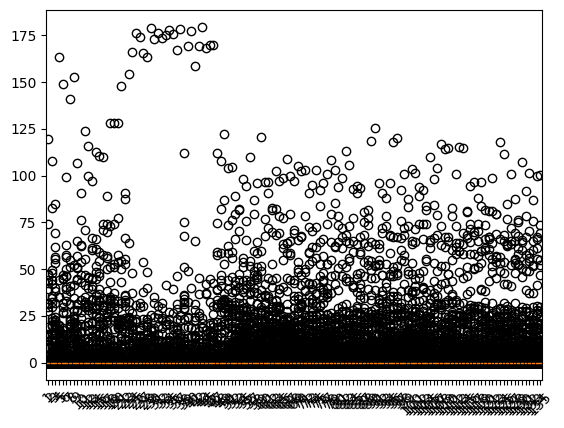

In [12]:
plt.boxplot(data)
plt.xticks(rotation=45)
plt.show()

In [7]:
data.columns

Index(['SRR13388732', 'SRR13388733', 'SRR13388734', 'SRR13388735',
       'SRR13388736', 'SRR13388737', 'SRR13388738', 'SRR13388739',
       'SRR13388740', 'SRR13388741',
       ...
       'SRR12604218', 'SRR12604219', 'SRR12604220', 'SRR12604221',
       'SRR12604222', 'SRR12604223', 'SRR12604224', 'SRR12604225',
       'SRR12604226', 'SRR12604227'],
      dtype='object', name='Sample', length=135)

In [85]:
 data[data.isna().any(axis=1)]

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR12604218,SRR12604219,SRR12604220,SRR12604221,SRR12604222,SRR12604223,SRR12604224,SRR12604225,SRR12604226,SRR12604227


In [86]:
data_corrected = pycombat(data,batch_info, precision=0.01)

Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [87]:
data_corrected

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR12604218,SRR12604219,SRR12604220,SRR12604221,SRR12604222,SRR12604223,SRR12604224,SRR12604225,SRR12604226,SRR12604227
ENSG00000000003.14,-0.029709,-0.031103,-0.036365,-0.025616,-0.022923,-0.031271,-0.030132,-0.028227,-0.038616,-0.033153,...,-0.026145,-0.024240,-0.024869,-0.025952,-0.022256,-0.022822,-0.024012,-0.025772,-0.024238,-0.023708
ENSG00000000005.5,-0.033326,-0.039507,-0.044738,-0.028677,-0.040827,-0.034513,-0.035622,-0.032540,-0.044084,-0.037598,...,-0.028506,-0.026454,-0.026960,-0.029573,-0.024711,-0.025901,-0.027802,-0.028949,-0.025915,-0.025898
ENSG00000000419.12,0.002005,0.003005,0.004145,0.003227,0.002693,0.001870,0.005237,0.002793,0.001695,0.002502,...,0.002466,0.000276,0.001774,0.003709,0.001246,0.006956,0.006038,0.002943,0.005085,0.001069
ENSG00000000457.13,-0.030784,-0.032629,-0.040295,-0.026331,-0.036048,-0.031783,-0.030089,-0.029366,-0.037115,-0.033633,...,-0.027947,-0.024519,-0.024401,-0.027631,-0.023371,-0.024336,-0.024567,-0.026864,-0.025750,-0.024191
ENSG00000000460.16,-0.030969,-0.037750,-0.035217,-0.027739,-0.030787,-0.032722,-0.032733,-0.031354,-0.039046,-0.031952,...,-0.026892,-0.024857,-0.025442,-0.027304,-0.023068,-0.024229,-0.026235,-0.027313,-0.024637,-0.024743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.031961,-0.037799,-0.044708,-0.027657,-0.039276,-0.032533,-0.032386,-0.031219,-0.042122,-0.036448,...,-0.026988,-0.026120,-0.023390,-0.028839,-0.024140,-0.025682,-0.026712,-0.027054,-0.023991,-0.025125
ENSG00000285491.1,-0.033335,-0.039469,-0.046196,-0.028813,-0.041412,-0.034514,-0.035614,-0.032555,-0.044012,-0.038050,...,-0.028501,-0.026439,-0.026948,-0.029574,-0.024687,-0.025883,-0.027794,-0.028947,-0.025897,-0.025880
ENSG00000285505.1,-0.033317,-0.039423,-0.046648,-0.028816,-0.041356,-0.034490,-0.035585,-0.032541,-0.043944,-0.038010,...,-0.028543,-0.026480,-0.026989,-0.029617,-0.024726,-0.025923,-0.027777,-0.028989,-0.025937,-0.025920
ENSG00000285508.1,-0.030483,-0.025926,-0.045080,-0.026051,-0.038771,-0.030818,-0.036266,-0.031529,-0.039435,-0.035494,...,-0.028520,-0.023889,-0.022113,-0.027439,-0.024266,-0.021547,-0.027849,-0.028562,-0.026048,-0.026032


In [91]:
data_corrected = data_corrected.T

Adjusting with reCombat

In [16]:
metadata_short =  pd.DataFrame({
    'Experiment': experiment_order,
    'Age': age_order,
    'Sample': sample_order
})
metadata_short.set_index('Sample', inplace=True)
metadata_short

,Experiment,Age
Sample,,
SRR13388732,GSE164471,23
SRR13388733,GSE164471,28
SRR13388734,GSE164471,31
SRR13388735,GSE164471,31
SRR13388736,GSE164471,35
...,...,...
SRR12604223,GSE157585,24
SRR12604224,GSE157585,24
SRR12604225,GSE157585,24


In [92]:
adjuested_data_full = pd.concat([data_corrected, metadata_short], axis=1)

In [93]:
unadjested_data_full= pd.concat([cts_process, metadata_short], axis=1)

In [94]:
adjuested_data_full.columns[10:]

Index(['ENSG00000001460.17', 'ENSG00000001461.16', 'ENSG00000001497.16',
       'ENSG00000001617.11', 'ENSG00000001626.14', 'ENSG00000001629.9',
       'ENSG00000001630.15', 'ENSG00000001631.15', 'ENSG00000002016.17',
       'ENSG00000002079.14',
       ...
       'ENSG00000285471.1', 'ENSG00000285472.1', 'ENSG00000285476.1',
       'ENSG00000285480.1', 'ENSG00000285491.1', 'ENSG00000285505.1',
       'ENSG00000285508.1', 'ENSG00000285509.1', 'Experiment', 'Age'],
      dtype='object', length=34497)

In [95]:
adjuested_data_full.to_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_adjusted.csv")

In [21]:
unadjested_data_full.to_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted_2.csv")

Looking at reCombat plotting

In [276]:
X = data_corrected.fillna(0, inplace=False).values 

In [277]:
X

array([[-0.02970872, -0.0333258 ,  0.00200499, ..., -0.03331705,
        -0.03048318, -0.03330771],
       [-0.0311027 , -0.03950657,  0.00300471, ..., -0.03942271,
        -0.02592574, -0.03854168],
       [-0.0363653 , -0.04473826,  0.00414531, ..., -0.04664831,
        -0.04508018, -0.04584445],
       ...,
       [-0.02577219, -0.02894936,  0.00294311, ..., -0.02898943,
        -0.02856208, -0.02888415],
       [-0.0242384 , -0.0259149 ,  0.00508524, ..., -0.02593687,
        -0.02604768, -0.02579059],
       [-0.02370841, -0.02589846,  0.0010687 , ..., -0.02592033,
        -0.026032  , -0.02574077]])

In [278]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


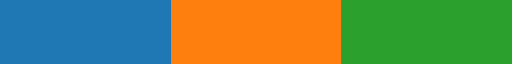

In [279]:
custom_cmap

Using tSNE


In [280]:
from sklearn.manifold import TSNE
X = data_corrected.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

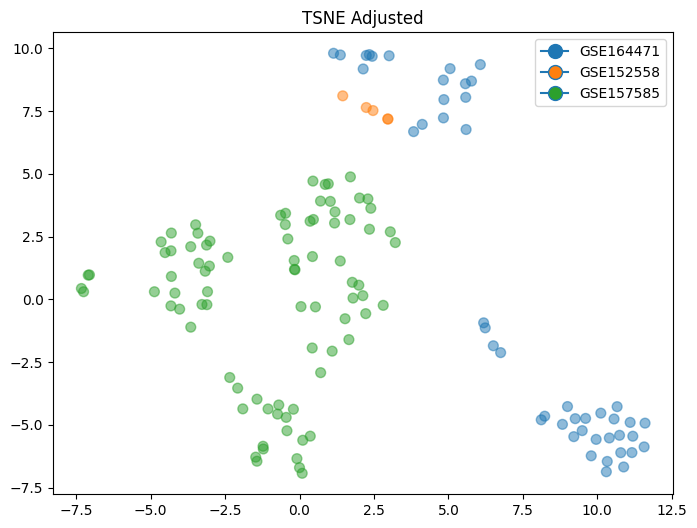

In [281]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("TSNE_Scatter_Plot_Experiment_reCombat.jpg")

Using PCA

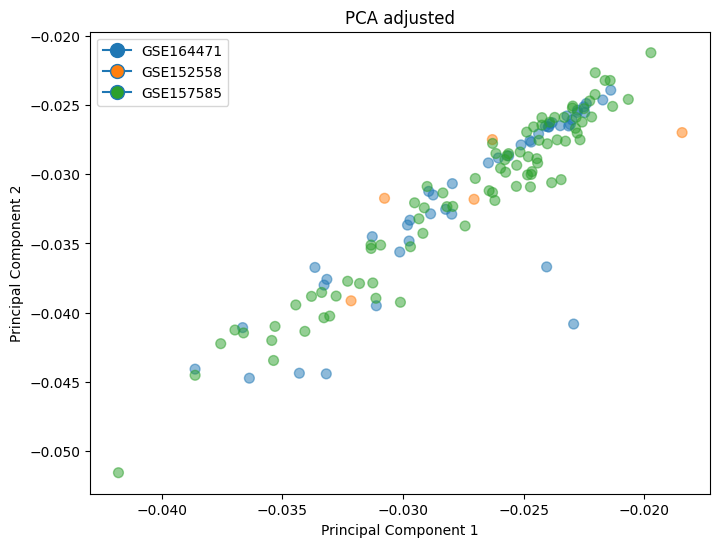

In [282]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Experiment_reCombat.jpg")

Lookign at the age

In [283]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [284]:
pd.DataFrame(age_order).value_counts()

Old          76
Young        33
MiddleAge    26
Name: count, dtype: int64

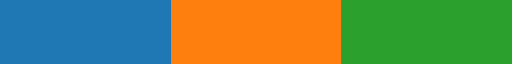

In [285]:
custom_cmap

tSNE

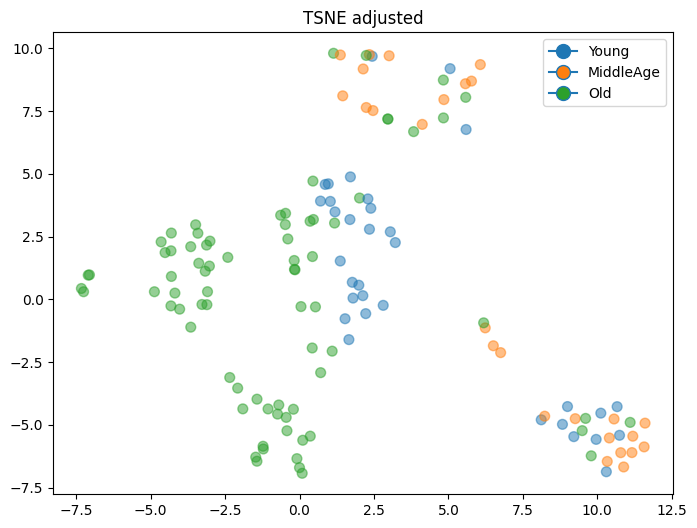

In [286]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

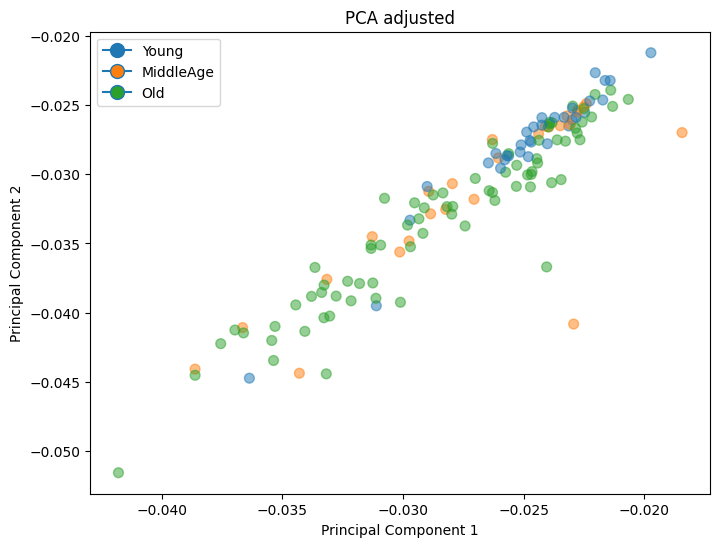

In [287]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

Unadjusted

In [297]:
X = cts_processed.values 


tSNE by experiment

In [298]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [299]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1}

# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i ] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

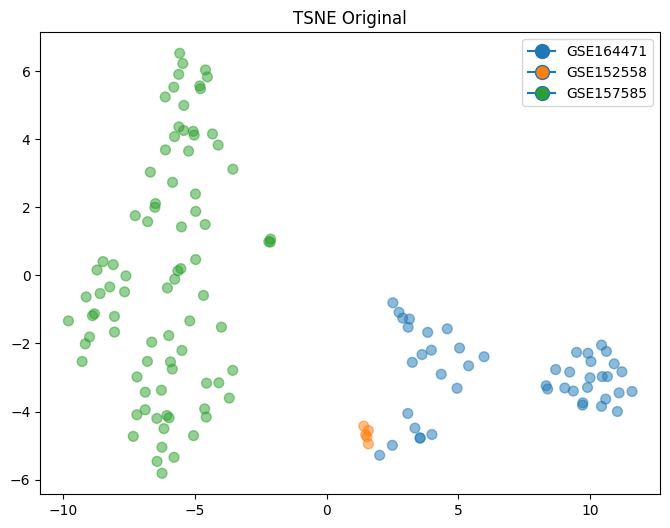

In [300]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()

plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

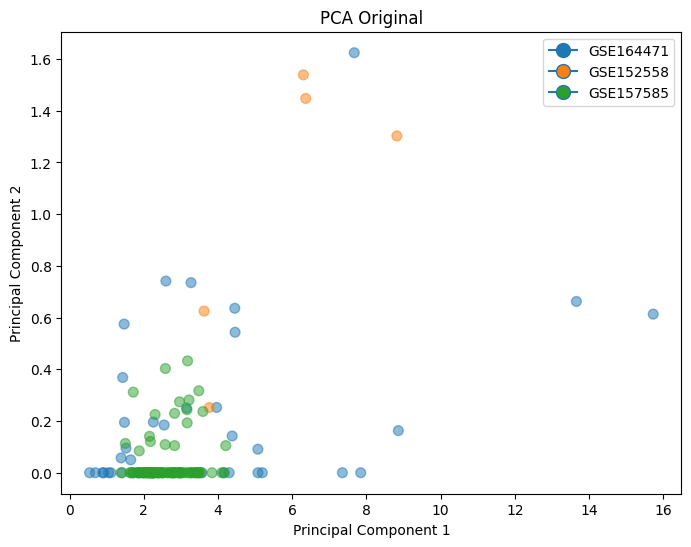

In [301]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [302]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

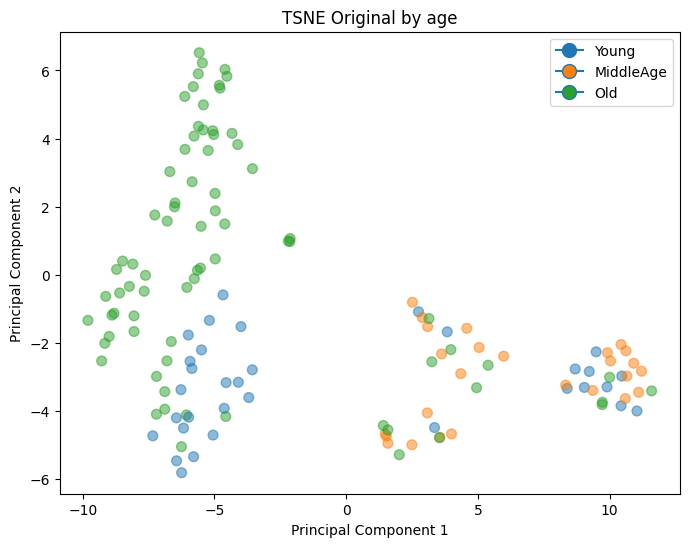

In [303]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

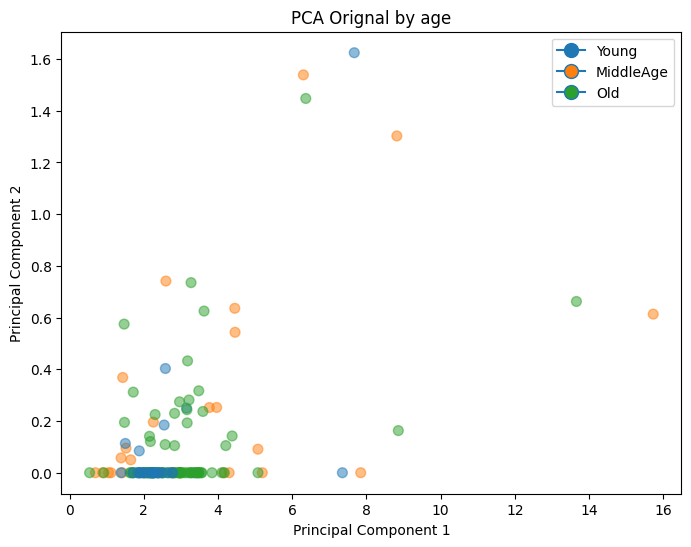

In [304]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP

In [296]:
import umap
